Our main aim in linear regression is to minimize the cost function to find the best fitted line for our data so as to give accurate predictions. To minimize the cost function, we need to optimize the values of w and b to fit our data well. This can be done using gradient descent

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
import math,copy

In [44]:
x_train=np.array([1,2])
y_train=np.array([300,500])

In [45]:
#Cost Function
def compute_cost(x,y,w,b):
    m=len(x)
    
    cost_sum=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost=(f_wb-y[i])**2
        cost_sum=cost_sum+cost
    
    total_cost=(1/(2*m))*cost_sum
    
    return total_cost

Gradient Descent can be described as:

repeat until convergence(
    
    w=w-a(dJ_wb/dw)
    
    b=b-a(dJ_wb/db)
)

where a stands for Learning Rate

dJ_dw_i=(f_wb(x(i))-y(i))x(i)/m

dJ_db_i=(f_wb(x(i))-y(i))/m

In [46]:
#Computing the gradient

def compute_gradient(x,y,w,b):
    m=len(x)
    dJ_dw=0
    dJ_db=0
    
    for i in range(m):
        f_wb=w*x[i]+b
        dJ_dw_i=(f_wb-y[i])*x[i]
        dJ_db_i=(f_wb-y[i])
        
        dJ_db=dJ_db+dJ_db_i
        dJ_dw=dJ_dw+dJ_dw_i
        
    dJ_db=dJ_db/m
    dJ_dw=dJ_dw/m
    
    return dJ_dw,dJ_db    

In [64]:
#Function to converge the gradient 

def gradient_descent(x,y,w_in,b_in,a,n,cost_function,gradient_function):
    #w_in,b_in are the initial chosen values of w and b to start the gradient descent
    #n is the number of iterations for which we will run the gradient descent
    
    J_history=[] #An array to store all the values of the cost functions for graphing
    p_history=[] #an array to store all the values of the paramaters w and b
    
    w=w_in
    b=b_in
    
    for i in range(n):
        dJ_dw,dJ_db=gradient_function(x,y,w,b) #Finding the values of gradients using the gradient function
        b=b-a*dJ_db #Updating the values of b and w
        w=w-a*dJ_dw
        
        if(i<999999):
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
            
            
        #if i% math.ceil(n/10) == 0:
        #    print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
        #         f"dJ_dw: {dJ_dw: 0.3e}, dJ_db: {dJ_db: 0.3e}  ",
        #         f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w,b,J_history,p_history

In [65]:
#Initialising w,b,a,n and checking gradient descent function
w_in=0
b_in=0
a=0.01
n=100000
w,b,J_history,p_history=gradient_descent(x_train,y_train,w_in,b_in,a,n,compute_cost,compute_gradient)

print(f'w,b given by gradient descent are:{w:.4f},{b:.4f}')

w,b given by gradient descent are:200.0000,100.0000


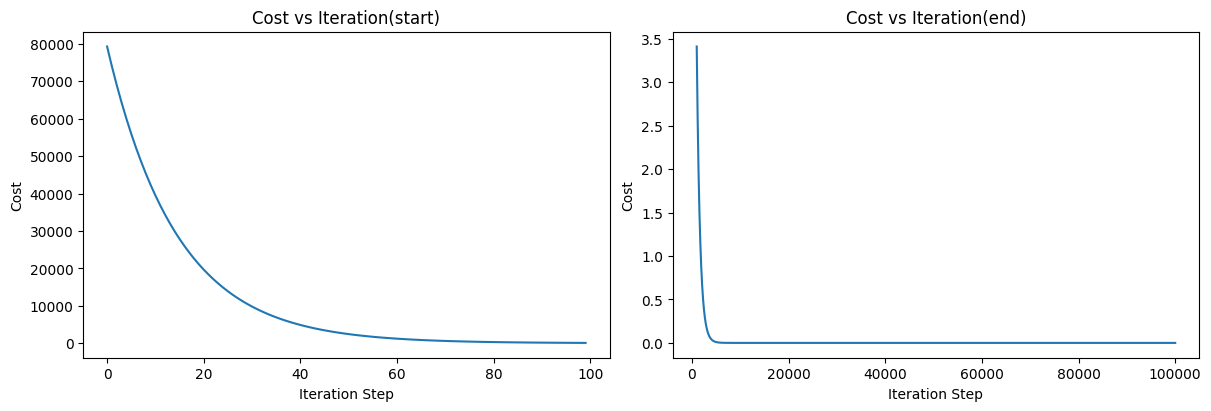

In [66]:
#Plotting a cost vs number of iterations graph
fig,(ax1,ax2)=plt.subplots(1,2,constrained_layout=True,figsize=(12,4))
ax1.plot(J_history[0:100])
ax2.plot(1000+np.arange(len(J_history[1000:])),J_history[1000:])
ax1.set_title('Cost vs Iteration(start)')
ax2.set_title('Cost vs Iteration(end)')
ax1.set_xlabel('Iteration Step')
ax2.set_xlabel('Iteration Step')
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
plt.show()

In [67]:
#Using this model,we can predict the prices of houses with the given area

print(f'Price of house with 1000sqft area={w*1.0+b:.4f}')
print(f'Price of house with 1200sqft area={w*1.2+b:.4f}')
print(f'Price of house with 2000sqft area={w*2.0+b:.4f}')
print(f'Price of house with 3400sqft area={w*3.4+b:.4f}')

Price of house with 1000sqft area=300.0000
Price of house with 1200sqft area=340.0000
Price of house with 2000sqft area=500.0000
Price of house with 3400sqft area=780.0000
